# 07 - Redução de Dimensionalidade e Dados Categóricos

Nessa aula, iremos tratar dos seguintes conteúdos:
- Redução de Dimensionalidade;
- PCA;
- Dados Categóricos;
- Teste Qui-Quadrado;
- Teste ANOVA.

## 

# 1. Redução de Dimensionalidade

## 1.1 Introdução

<br>

Com o avanço tecnológico e com aumento gradativo da geração e armazenamento de dados, os conjuntos de dados a serem trabalhados por modelos de _Machine Learning_ e _Data Science_ estão cada vez maiores e mais complexos, implicando também em um aumento gradativo do poder e tempo de processamento de máquinas sejam elas locais ou em processamento em nuvem.

Mas com o objetivo de minimizar estes impactos, existem algumas técnicas complementares visando auxiliar e diminuir esta carga de processamento, uma dessas técnicas seria a __redução de dimensionalidade__. Redução de dimensionalidade é uma técnica bastante usada em conjunto de dados, normalmente grandes, com o objetivo de aumentar a interpretabilidade dos dados minimizando a quantidade de informação perdida no processo.

uma das principais técnicas de redução de dimensionalidade utilizadas é o __Análise de Componente Principal (PCA)__, técnicas que será detalhada a seguir.

<br><br>

## 1.2 Análise de Componente Principal (PCA)

<br>

A Análise de Componente Principal (_Principal Component Analysis_ em inglês) é a técnica para reduzir a dimensionalidade desses conjuntos de dados, aumentando a interpretabilidade concomitante a minimização da perda de informações. Isso é feito criando novas variáveis não correlacionadas, preservando o máximo de variabilidade possível. O processo matemático por trás disso consiste em uma transformação linear buscando calcular os __autovetores__ e indicando as direções principais deste conjunto de dados.

<br>

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png" width=800>

Fonte: [Analytic Vidhya](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png)

<br>

Este processo basicamente reduz a dimensionalidade do conjunto de dados em um valor $n$, onde $n$ é a quantidade de dimensões a serem utilizadas, retornando pelo PCA uma quantidade $n$ de componentes principais que representam a variabilidade dos dados.

Algumas das vantagens desse processo seria o ganho de uma **interpretação gráfica dos dados** minimizando a perda de informação e também um processo interessante para utilizar em testes de modelo onde seria necessa´rio utilizar um __conjunto de dados muito grande__, pois testa-se o modelo com poucas variáveis mas sem perder o valor e a variabilidade dos dados originais.

A implementação em _Python_ para o PCA é dada pelo bloco de código abaixo:

<br>

```python
# Carregando o PCA do Scikit-Learn
from sklearn.decomposition import PCA

# Istanciando o PCA
pca = PCA(n_components = 2,  # Quantidade de componentes que serão utilizadas
          random_state = 42) # Semente Aleatório

# Transforma os dados e cria o número de componentes necessários
X_pca = pca.fit_transform(X)

```

<br><br>

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carrega o conjunto de dados
covid = pd.read_csv('COVID.csv', index_col = 0)
covid

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [5]:
# dados faltantes
covid.isna().sum()

sex                         0
patient_type                0
intubed                392268
pneumonia                  11
age                         0
pregnancy              254434
diabetes                 1641
copd                     1446
asthma                   1442
inmsupr                  1662
hypertension             1489
other_disease            2193
cardiovascular           1509
obesity                  1470
renal_chronic            1476
tobacco                  1579
contact_other_covid    153675
covid_res                   0
icu                    392269
dtype: int64

In [8]:
# preenche com zero os dados faltantes
covid.fillna(0, inplace=True) 

In [9]:
# dados faltantes
covid.isna().sum()

sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [10]:
# Separa em X e Y os dados
X = covid.drop(['covid_res'], axis = 1)
y = covid['covid_res']

In [17]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train_std, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test_std)

In [28]:
# Carregando o PCA do Scikit-Learn
from sklearn.decomposition import PCA

# Istanciando o PCA
pca = PCA(n_components = 2,  # Quantidade de componentes que serão utilizadas
          random_state = 42) # Semente Aleatório

In [29]:
# Transforma os dados e cria o número de componentes necessários
X_pca = pca.fit_transform(X_test_std)

In [30]:
# Olhando os daods convertidos
X_pca

array([[ 1.05654963,  1.28714164],
       [-1.21396365,  0.38918511],
       [ 6.18003227,  7.27409374],
       ...,
       [-1.0898348 ,  0.0719742 ],
       [ 0.20666985,  1.05468597],
       [-0.9100072 ,  0.02700606]])

In [31]:
# transformando em um Dataframe
df_PCA = pd.DataFrame(X_pca, columns = ['x_PCA', 'y_PCA'])

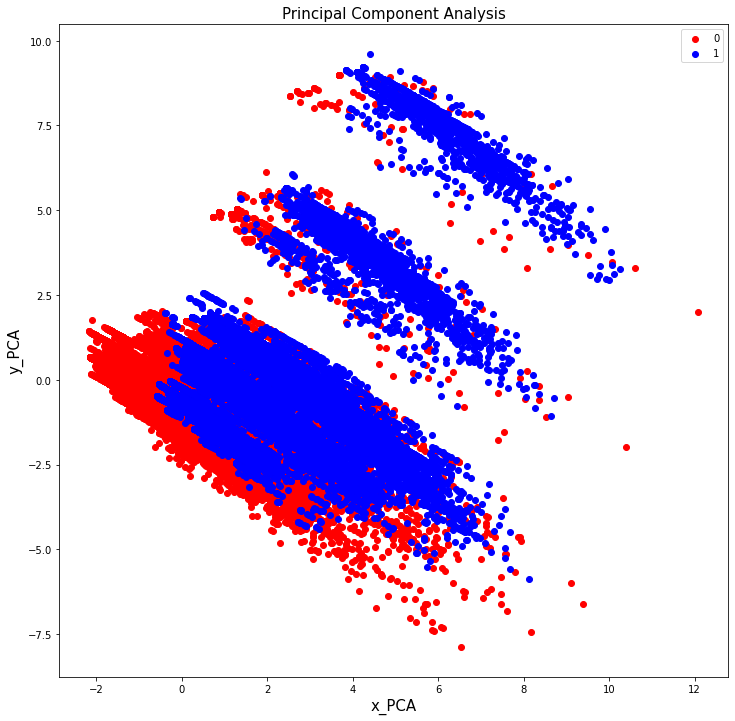

In [33]:
# Construindo o gráfico
class_labels = np.unique(y_pred)

colors = ['red', 'blue']
aux = 0
plt.figure(figsize=(12,12))
for c in class_labels:
    ind = np.where(y_pred == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

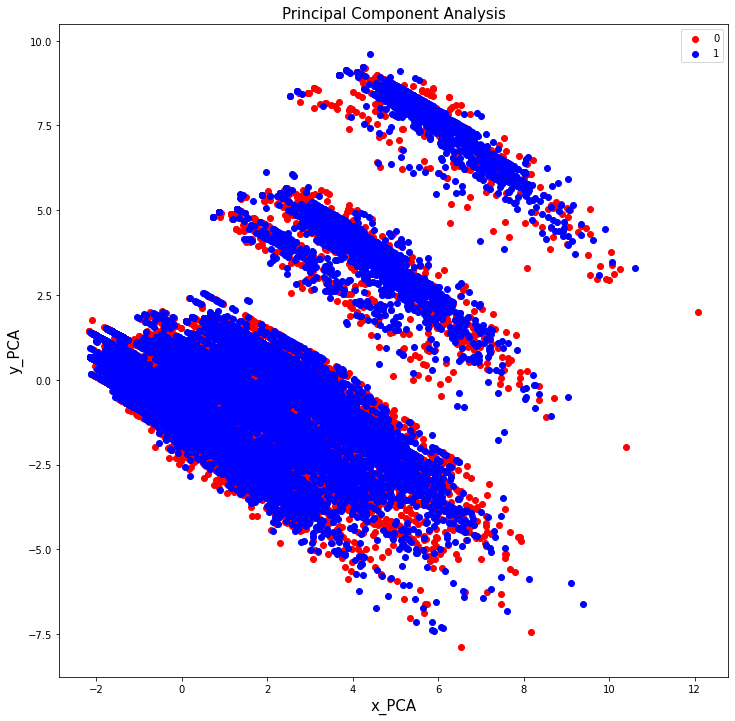

In [34]:
# Construindo o gráfico
class_labels = np.unique(y_test)

colors = ['red', 'blue']
aux = 0
plt.figure(figsize=(12,12))
for c in class_labels:
    ind = np.where(y_test == c)
    plt.scatter(df_PCA['x_PCA'].iloc[ind], df_PCA['y_PCA'].iloc[ind], color = colors[aux], label = c)
    aux = aux + 1
plt.xlabel('x_PCA', fontsize=15)
plt.ylabel('y_PCA', fontsize=15)
plt.title('Principal Component Analysis', fontsize=15)
plt.legend()
plt.show()

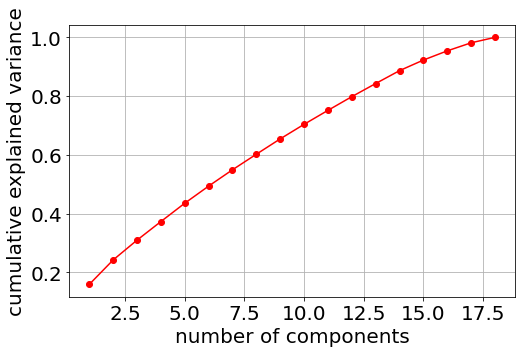

In [35]:
pca = PCA(random_state = 42).fit(X_test_std)

plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X_test_std)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

## 

# 2. Dados Categóricos

## 2.1 Introdução

<br>

Os dados categóricos são os tipos de variáveis definidos anteriormente como variáveis __qaulitativas__ e que poderiam ser separados em dois principais tipos, __nominais__ ou __ordinais__ como definidos abaixo:

<br> 

- __qualitativa nominal__: as variáveis do tipo qualitativas não apresentam valores mensuráveis. No caso das variáveis __qualitativas__ e __nominais__, as variáveis __não apresentam uma ordenação ou hierárquia__ entre as categorias. __Exemplo:__ Sexo, País, estado civil e etc;

- __qualitativa ordinal__: Já para as variáveis __qualitativas__ e __ordinais__, as variáveis __apresentam uma ordenação ou hierárquia__ entre as categorias. __Exemplo:__ escolaridade, faixa salarial, período do dia e etc.

<br>

De forma análoga ao processo feito com as variáveis __quantitativas__ (no caso númericas), existem testes de hipóteses que são capazes de dizer a qualidade de uma determinada variável categórica em relação ao poder de separação em um modelo. Os testes que são aplicados em variáveis categóricas são os chamados de __testes não-paramétricos__.

Nos tópicos a seguir, será discutido a respeito de dois testes muito utilizados no processo de __seleção de atributos__, estes testes são o __Qui-Quadrado__ e __ANOVA__

<br><br>

## 2.2 Teste Qui-Quadrado

<br>

O Teste __Qui-Quadrado__ (_Chi-Squared_ em inglês) é um teste não-paramétrico que mede a relação de dependência entre duas variáveis categóricas, verificando se os valores esperados estão muito distantes dos valores observados para estas métricas. Ou seja, dados o vetor de contagens observadas $Oij=(O_{11},O_{12}, .…, O_{rc})$, r $E_{ij}$ representa os valores esperadas e admintindo válida a hipótese de independência dos critérios de classificação, a estatística para oteste de Qui-Quadrado pode ser definida a seguir:

<br>

$$ X^2 = \sum_{i=1}^r \sum_{j=1}^c \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

<br>

Para valores altos da estatística do QUi_quadrado (respectivamente um valor baixo para o _p-value_), significa uma evidência forte que os valores observados e esperados são diferentes, portanto possuem dependência entre si. Esse grau de dependência entre as variáveis está relacionado diretamente com o valor do Qui_quadrado, quanto maior o valor da estatística, maior a dependência.

A implementação em _Python_ para o teste Quidrado pode ser feito conforme o código a seguir:

<br>

```python
# Carrega a função do Qui Quadrado
from sklearn.feature_selection import chi2

# Aplicando o teste Qui quadrado
chi_scores = chi2(X, # Todas as variáveis categóricas
                  y) # Variável resposta 
```

<br>

Dessa forma, é possível determinar dentre todas as variáveis categóricas em um conjunto de dados, quais que têm forte dependência com a variável resposta, em modelos de classificação no caso. Vale ressaltar que as variáveis categóricas devem ser convertidas para uma identificação númerica antes de aplicar o teste.

<br><br>

## 2.3 ANOVA

<br>

O teste __ANOVA__ (_Analysis of Variance_ em inglês) é um teste não-paramétrico para verificar se existe diferenças significativas entre as médias de grupos de dados, sendo possível inferir se as variáveis são dependentes uma sobre a outra. Para isso, calcula-se a relação entre a variância entre grupos $S_B^2$ com a variância dentro dos grupos $S_W^2$, conforme a fórmula a seguir:

<br>

$$ F = \frac{S_B^2}{S_W^2}$$

<br>

A partir da estatística do valor $F$, quanto maior for a variância entre os grupos, mais diferentes as duas variáveis serão entre si. Dessa forma de acordo com o valor $F$ pode se inferir a respeito das variáveis serem diferentes e exercerem influência entre si.

A implementação em _Python_ para o teste ANOVA pode ser feito conforme o código a seguir:

<br>

```python
# Carrega a função ANOVA
from sklearn.feature_selection import f_classif

# Aplicando o teste Qui quadrado
F_scores = f_classif(X, # Todas as variáveis categóricas
                     y) # Variável resposta 
```

<br>

De forma análoga ao Qui-Quadrado, com este teste é possível determinar dentre todas as variáveis categóricas em um conjunto de dados, quais que têm forte dependência com a variável resposta, em modelos de classificação no caso. Vale ressaltar novamente que as variáveis categóricas devem ser convertidas para uma identificação númerica antes de aplicar o teste.

<br><br>

### Usando o Qui-Quadrado

In [45]:
# Carrega a função do Qui Quadrado
from sklearn.feature_selection import chi2

In [43]:
X = X.drop(['age'], axis = 1)

In [46]:
# Aplicando o teste Qui quadrado
chi_scores = chi2(X, # Todas as variáveis categóricas
                  y) # Variável resposta 

In [47]:
chi_scores

(array([1.34230286e+03, 4.47634957e+03, 2.84986834e+03, 1.71986949e+04,
        3.27704975e+01, 4.87178638e+03, 2.42443612e+01, 3.00921382e+02,
        1.50913033e+02, 3.49982016e+03, 6.95788132e+01, 5.07398149e+00,
        2.46878333e+03, 5.38510161e+01, 3.26382150e+02, 3.31947108e+03,
        1.53022969e+03]),
 array([7.24986724e-294, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.03706937e-008, 0.00000000e+000, 8.48551433e-007, 2.07507699e-067,
        1.09495507e-034, 0.00000000e+000, 7.34213380e-017, 2.42875369e-002,
        0.00000000e+000, 2.16283207e-013, 5.89892555e-073, 0.00000000e+000,
        0.00000000e+000]))

In [49]:
# Avaliando as Features
list_columns = list(X.columns)

chi_score = list(chi_scores[0])

p_value = list(chi_scores[1])


dict_output = {
    "Feature": list_columns,
    "Chi Score": chi_score,
    "P-Value": np.round(p_value, 3)
}

df_chi = pd.DataFrame(dict_output)

df_chi

,Feature,Chi Score,P-Value
0,sex,1342.302856,0.000
1,patient_type,4476.349572,0.000
2,intubed,2849.868343,0.000
3,pneumonia,17198.694878,0.000
4,pregnancy,32.770498,0.000
5,diabetes,4871.786377,0.000
6,copd,24.244361,0.000
7,asthma,300.921382,0.000
8,inmsupr,150.913033,0.000
9,hypertension,3499.820164,0.000


### Utilizando o ANOVA

In [50]:
# Carrega a função ANOVA
from sklearn.feature_selection import f_classif

# Aplicando o teste Qui quadrado
F_scores = f_classif(X, # Todas as variáveis categóricas
                     y) # Variável resposta

In [51]:
# avaliando os F scores
F_scores

(array([2.66423093e+03, 2.17017047e+04, 2.91969748e+03, 2.12840487e+04,
        3.30112839e+01, 5.62900572e+03, 2.46537813e+01, 3.11205585e+02,
        1.53437077e+02, 4.21553802e+03, 7.18001919e+01, 5.19267737e+00,
        2.97048765e+03, 5.49586639e+01, 3.57331513e+02, 5.53998107e+03,
        1.56319358e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.16785040e-09, 0.00000000e+00, 6.86325364e-07, 1.25247037e-69,
        3.11122989e-35, 0.00000000e+00, 2.38761060e-17, 2.26826663e-02,
        0.00000000e+00, 1.23284444e-13, 1.14427637e-79, 0.00000000e+00,
        0.00000000e+00]))

In [53]:
# Avaliando as Features
list_columns = list(X.columns)

F_score = list(F_scores[0])

p_value = list(F_scores[1])


dict_output = {
    "Feature": list_columns,
    "F Score": F_score,
    "P-Value": np.round(p_value, 3)
}

df_F = pd.DataFrame(dict_output)

df_F

,Feature,F Score,P-Value
0,sex,2664.230927,0.000
1,patient_type,21701.704706,0.000
2,intubed,2919.697477,0.000
3,pneumonia,21284.048743,0.000
4,pregnancy,33.011284,0.000
5,diabetes,5629.005719,0.000
6,copd,24.653781,0.000
7,asthma,311.205585,0.000
8,inmsupr,153.437077,0.000
9,hypertension,4215.538022,0.000


## 

## Exercícios

__1)__ Realize uma classificação com da coluna y dos dados de marketing bancário (contido no arquivo `bank-full.csv`) utilizando uma Regressão Logística. Após isso faça o processo de seleção de atributos utilizados o Lasso e Os testes Qui-Quadrado e ANOVA. Qual resultado do modelo ficou melhor antes ou depois da seleção de atributos? Plote os dados de teste utilizando o PCA e compare as separações.

In [ ]:
df = pd.read_csv('./datasets/bank-full.csv', sep=';')
df.head()

__2)__ Vamos trabalhar com o dataset `sports.csv`, para predizer se um determinado atleta têm mais que 5 anos de carreira ou não (está é justamente a marcação de _target_ na base). Para o desenvolvimento do exercício aplique uma seleção de atributos, depois modele utilizando uma Regressão Logística e por fiz avalie a separação dos dados com o PCA.

In [54]:
sports = pd.read_csv('sports.csv')
sports

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,...,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [55]:
sports.dtypes

Name                  object
GamesPlayed            int64
MinutesPlayed        float64
PointsPerGame        float64
FieldGoalsMade       float64
FieldGoalsAttempt    float64
FieldGoalPercent     float64
3PointMade           float64
3PointAttempt        float64
3PointPercent        float64
FreeThrowMade        float64
FreeThrowAttempt     float64
FreeThrowPercent     float64
OffensiveRebounds    float64
DefensiveRebounds    float64
Rebounds             float64
Assists              float64
Steals               float64
Blocks               float64
Turnovers            float64
Target                 int64
dtype: object

## 